In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("ANALISIS PENGGUNAAN LAYAR DEVICE PADA ANAK INDIA 2025")
print("="*60)

# ========================================================================
# a. DATA COLLECTION
# ========================================================================
print("\n=== SECTION 1 : DATA COLLECTION ===")
print("Loading and examining the Penggunaan Layar Device Pada Anak India 2025 datasheet...")

# Membaca file CSV asli - DIPERBAIKI: sesuaikan nama file
df = pd.read_csv('Penggunaan_Layar_Device_Anak_India_2025.csv')  # Menggunakan tab separator karena format data
print(f"✓ Dataset loaded successfully!")
print(f"✓ Dataset shape: {df.shape}")

# Tampilkan informasi dasar dataset
print(f"\n📊 Dataset Information:")
print(f"   - Total records: {len(df)}")
print(f"   - Total columns: {len(df.columns)}")
print(f"   - Column names: {list(df.columns)}")

print(f"\n🔍 First 5 rows of the dataset:")
print(df.head())

print(f"\n📈 Dataset Info:")
print(df.info())

print(f"\n📊 Basic Statistics:")
print(df.describe())


ANALISIS PENGGUNAAN LAYAR DEVICE PADA ANAK INDIA 2025

=== SECTION 1 : DATA COLLECTION ===
Loading and examining the Penggunaan Layar Device Pada Anak India 2025 datasheet...
✓ Dataset loaded successfully!
✓ Dataset shape: (3549, 8)

📊 Dataset Information:
   - Total records: 3549
   - Total columns: 8
   - Column names: ['Usia', 'Jenis_Kelamin', 'Rata_rata_Waktu_Layar_per_Hari_(jam)', 'Perangkat_Utama', 'Melebihi_Batas_Waktu_yang_Direkomendasikan', 'Rasio_Edukasi_terhadap_Hiburan', 'Dampak_Kesehatan', 'Tinggal_di_Perkotaan_atau_Pedesaan']

🔍 First 5 rows of the dataset:
   Usia Jenis_Kelamin  Rata_rata_Waktu_Layar_per_Hari_(jam) Perangkat_Utama  \
0  11.0        Female                                  4.61          Laptop   
1  18.0        Female                                  3.73              TV   
2  14.0        Female                                  4.88      Smartphone   
3  18.0          Male                                  3.53          Tablet   
4  15.0        Female      


=== SECTION 2 : EDA DAN VISUALISASI DATA ===

🧹 DATA CLEANING & PREPROCESSING
----------------------------------------
Kolom yang tersedia dalam dataset:
['Usia', 'Jenis_Kelamin', 'Rata_rata_Waktu_Layar_per_Hari_jam', 'Perangkat_Utama', 'Melebihi_Batas_Waktu_yang_Direkomendasikan', 'Rasio_Edukasi_terhadap_Hiburan', 'Dampak_Kesehatan', 'Tinggal_di_Perkotaan_atau_Pedesaan']

Jumlah missing value per kolom:
Usia                                          0
Jenis_Kelamin                                 0
Rata_rata_Waktu_Layar_per_Hari_jam            0
Perangkat_Utama                               0
Melebihi_Batas_Waktu_yang_Direkomendasikan    0
Rasio_Edukasi_terhadap_Hiburan                0
Dampak_Kesehatan                              0
Tinggal_di_Perkotaan_atau_Pedesaan            0
dtype: int64

Setelah menghapus missing values:
Shape berubah dari (3549, 8) menjadi (3549, 8)
✓ Usia converted to numeric
✓ Rata_rata_Waktu_Layar_per_Hari_jam converted to numeric
✓ Rasio_Edukasi_terhadap_H

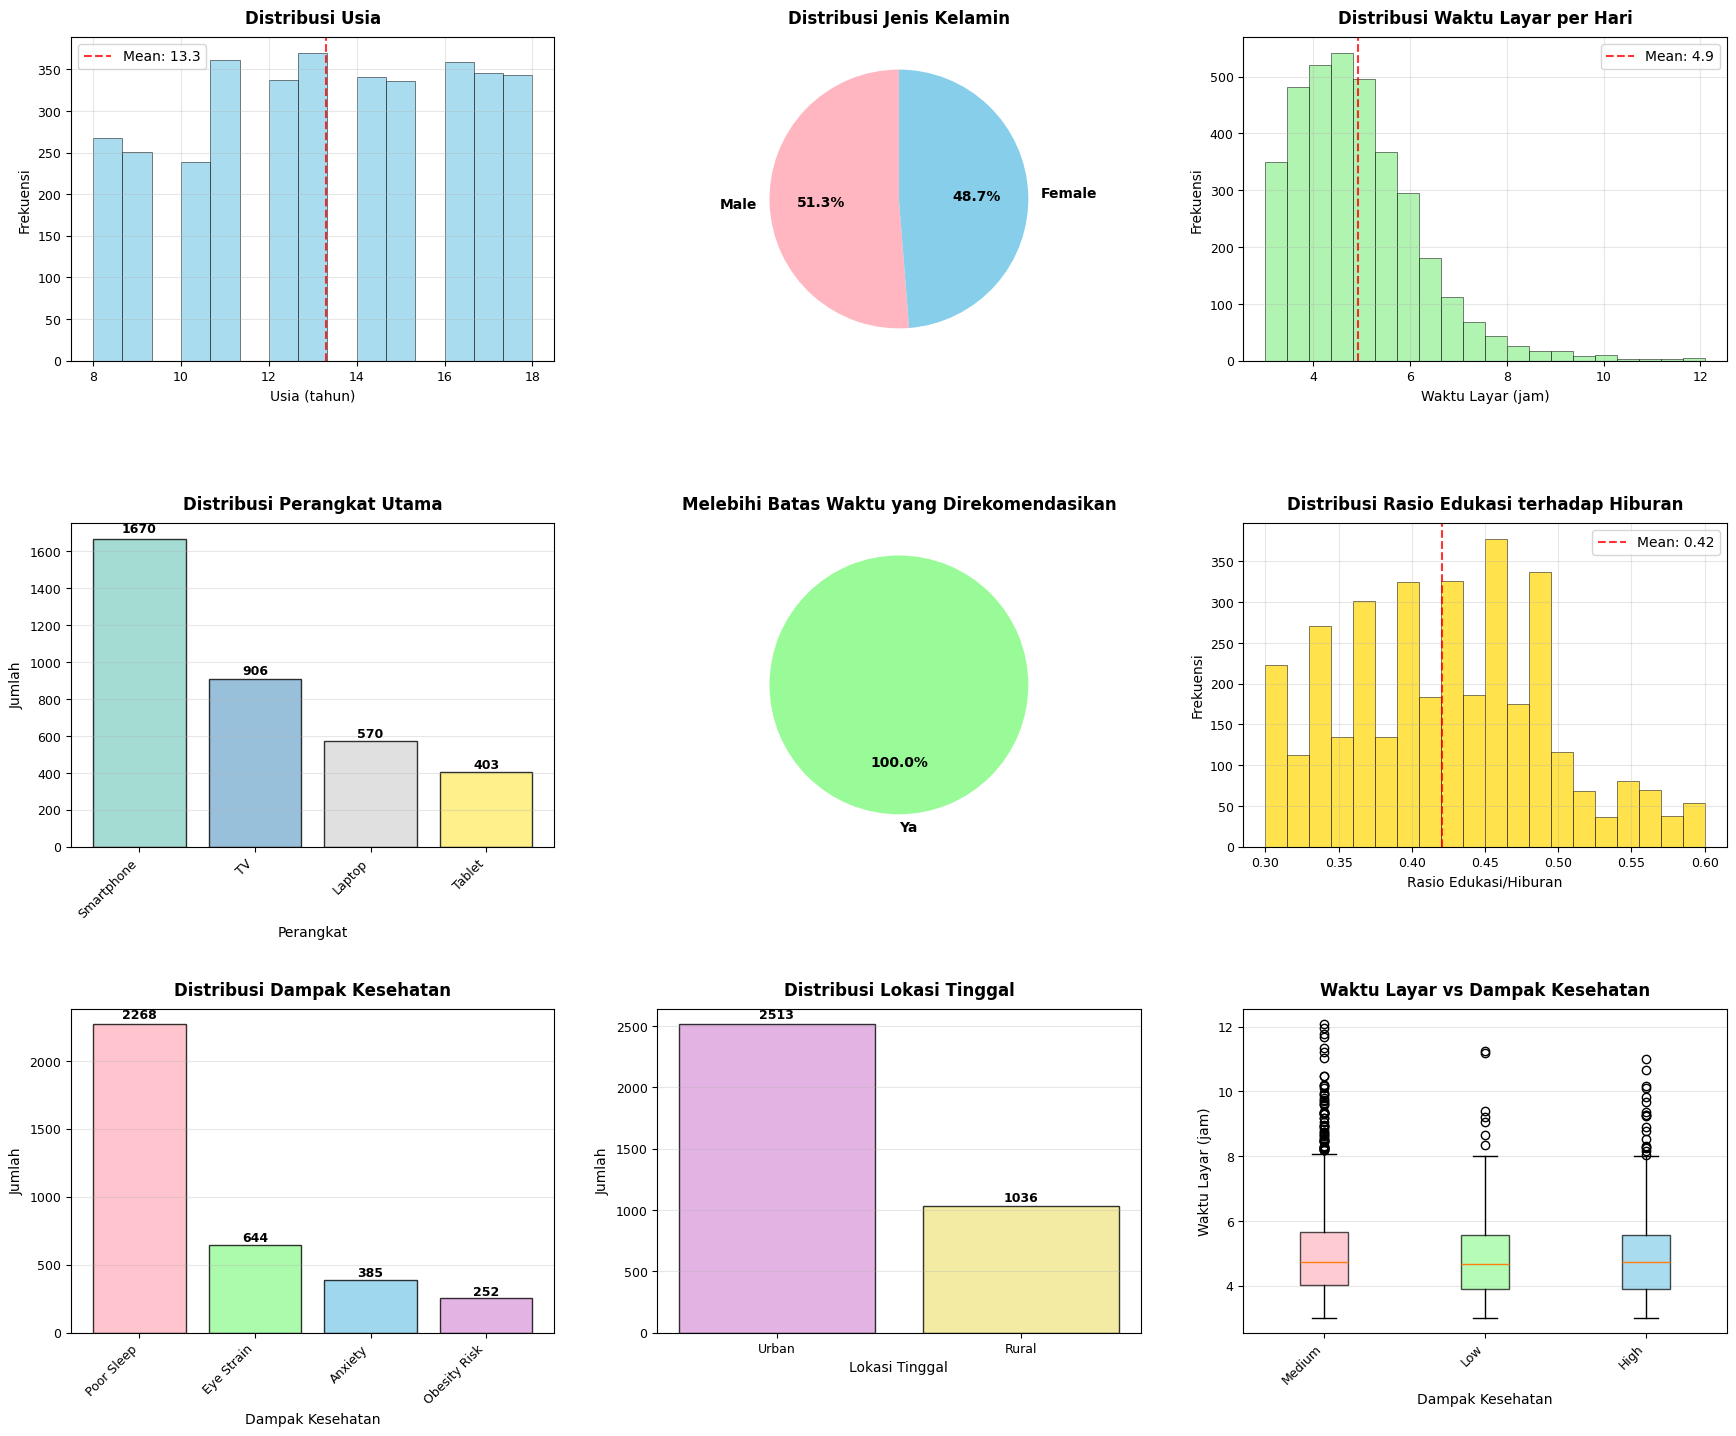


📈 RINGKASAN STATISTIK

🔢 STATISTIK NUMERIK
------------------------------

Usia:
  • Mean (Rata-rata): 13.30
  • Median: 13.00
  • Standard Deviation: 3.06
  • Min: 8.00
  • Max: 18.00
  • Q1 (25%): 11.00
  • Q3 (75%): 16.00

Rata_rata_Waktu_Layar_per_Hari_jam:
  • Mean (Rata-rata): 4.92
  • Median: 4.72
  • Standard Deviation: 1.29
  • Min: 3.01
  • Max: 12.09
  • Q1 (25%): 3.96
  • Q3 (75%): 5.61

Rasio_Edukasi_terhadap_Hiburan:
  • Mean (Rata-rata): 0.42
  • Median: 0.42
  • Standard Deviation: 0.07
  • Min: 0.30
  • Max: 0.60
  • Q1 (25%): 0.37
  • Q3 (75%): 0.47

📊 DISTRIBUSI KATEGORIKAL
------------------------------

Jenis_Kelamin:
  • Male: 1819 (51.3%)
  • Female: 1730 (48.7%)

Perangkat_Utama:
  • Smartphone: 1670 (47.1%)
  • TV: 906 (25.5%)
  • Laptop: 570 (16.1%)
  • Tablet: 403 (11.4%)

Tinggal_di_Perkotaan_atau_Pedesaan:
  • Urban: 2513 (70.8%)
  • Rural: 1036 (29.2%)

Dampak_Kesehatan:
  • Poor Sleep: 2268 (63.9%)
  • Eye Strain: 644 (18.1%)
  • Anxiety: 385 (10.8%)
  •

In [7]:


# ========================================================================
# 2. EDA dan Visualisasi Data
# ========================================================================
print("\n" + "="*60)
print("=== SECTION 2 : EDA DAN VISUALISASI DATA ===")
print("="*60)

# Data Cleaning dan Preprocessing
print("\n🧹 DATA CLEANING & PREPROCESSING")
print("-" * 40)

# 1. Hapus spasi dari nama kolom
df.columns = df.columns.str.strip()

# 2. Rename kolom untuk konsistensi
df = df.rename(columns={
    'Rata_rata_Waktu_Layar_per_Hari_(jam)': 'Rata_rata_Waktu_Layar_per_Hari_jam'
})

# 3. Cek kolom yang ada
print("Kolom yang tersedia dalam dataset:")
print(list(df.columns))

# 4. Konversi boolean TRUE/FALSE ke Yes/No untuk konsistensi
df['Melebihi_Batas_Waktu_yang_Direkomendasikan'] = df['Melebihi_Batas_Waktu_yang_Direkomendasikan'].map({
    True: 'Ya',
    False: 'Tidak',
    'TRUE': 'Ya',
    'FALSE': 'Tidak'
})

# 5. Cek nilai null
print("\nJumlah missing value per kolom:")
missing_values = df.isnull().sum()
print(missing_values)

# 6. Hapus atau isi data yang hilang
original_shape = df.shape
df = df.dropna()
print(f"\nSetelah menghapus missing values:")
print(f"Shape berubah dari {original_shape} menjadi {df.shape}")

# 7. Konversi tipe data untuk kolom numerik
numeric_cols = ['Usia', 'Rata_rata_Waktu_Layar_per_Hari_jam', 'Rasio_Edukasi_terhadap_Hiburan']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"✓ {col} converted to numeric")

# 8. Encode kolom kategorikal
print("\n🔄 ENCODING CATEGORICAL VARIABLES")
print("-" * 40)

categorical_cols = ['Jenis_Kelamin', 'Perangkat_Utama', 'Tinggal_di_Perkotaan_atau_Pedesaan',
                   'Dampak_Kesehatan', 'Melebihi_Batas_Waktu_yang_Direkomendasikan']

encoder = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col + '_encoded'] = encoder.fit_transform(df[col].astype(str))
        print(f"✓ {col} encoded successfully")

print(f"\n📋 Final dataset shape: {df.shape}")
print(f"📋 Final dataset columns: {list(df.columns)}")

# VISUALISASI DATA
print("\n📊 DATA VISUALIZATION")
print("-" * 40)

# Set style untuk visualisasi yang lebih baik
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

# Buat figure dengan layout 3x3
fig = plt.figure(figsize=(18, 15))

# 1. Distribusi Usia
plt.subplot(3, 3, 1)
if 'Usia' in df.columns:
    data = df['Usia'].dropna()
    plt.hist(data, bins=15, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5)
    plt.title('Distribusi Usia', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Usia (tahun)', fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(True, alpha=0.3)
    mean_val = data.mean()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.1f}')
    plt.legend()

# 2. Distribusi Jenis Kelamin
plt.subplot(3, 3, 2)
if 'Jenis_Kelamin' in df.columns:
    counts = df['Jenis_Kelamin'].value_counts()
    colors = ['#FFB6C1', '#87CEEB']

    wedges, texts, autotexts = plt.pie(counts.values,
                                      labels=counts.index,
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

    plt.title('Distribusi Jenis Kelamin', fontsize=12, fontweight='bold', pad=10)

# 3. Distribusi Waktu Layar
plt.subplot(3, 3, 3)
if 'Rata_rata_Waktu_Layar_per_Hari_jam' in df.columns:
    data = df['Rata_rata_Waktu_Layar_per_Hari_jam'].dropna()
    plt.hist(data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black', linewidth=0.5)
    plt.title('Distribusi Waktu Layar per Hari', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Waktu Layar (jam)', fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(True, alpha=0.3)
    mean_val = data.mean()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.1f}')
    plt.legend()

# 4. Distribusi Perangkat Utama
plt.subplot(3, 3, 4)
if 'Perangkat_Utama' in df.columns:
    counts = df['Perangkat_Utama'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(counts)))

    bars = plt.bar(range(len(counts)), counts.values,
                  color=colors, alpha=0.8, edgecolor='black')

    plt.title('Distribusi Perangkat Utama', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Perangkat', fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right')

    # Tambahkan value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')

# 5. Distribusi Melebihi Batas Waktu
plt.subplot(3, 3, 5)
if 'Melebihi_Batas_Waktu_yang_Direkomendasikan' in df.columns:
    counts = df['Melebihi_Batas_Waktu_yang_Direkomendasikan'].value_counts()
    colors = ['#98FB98', '#FFB6C1']

    wedges, texts, autotexts = plt.pie(counts.values,
                                      labels=counts.index,
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

    plt.title('Melebihi Batas Waktu yang Direkomendasikan', fontsize=12, fontweight='bold', pad=10)

# 6. Distribusi Rasio Edukasi terhadap Hiburan
plt.subplot(3, 3, 6)
if 'Rasio_Edukasi_terhadap_Hiburan' in df.columns:
    data = df['Rasio_Edukasi_terhadap_Hiburan'].dropna()
    plt.hist(data, bins=20, alpha=0.7, color='gold', edgecolor='black', linewidth=0.5)
    plt.title('Distribusi Rasio Edukasi terhadap Hiburan', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Rasio Edukasi/Hiburan', fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(True, alpha=0.3)
    mean_val = data.mean()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    plt.legend()

# 7. Distribusi Dampak Kesehatan
plt.subplot(3, 3, 7)
if 'Dampak_Kesehatan' in df.columns:
    counts = df['Dampak_Kesehatan'].value_counts()
    colors = ['#FFB6C1', '#98FB98', '#87CEEB', '#DDA0DD', '#F0E68C']

    bars = plt.bar(range(len(counts)), counts.values,
                  color=colors[:len(counts)], alpha=0.8, edgecolor='black')

    plt.title('Distribusi Dampak Kesehatan', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Dampak Kesehatan', fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right')

    # Tambahkan value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')

# 8. Distribusi Lokasi Tinggal
plt.subplot(3, 3, 8)
if 'Tinggal_di_Perkotaan_atau_Pedesaan' in df.columns:
    counts = df['Tinggal_di_Perkotaan_atau_Pedesaan'].value_counts()
    colors = ['#DDA0DD', '#F0E68C']

    bars = plt.bar(range(len(counts)), counts.values,
                  color=colors[:len(counts)], alpha=0.8, edgecolor='black')

    plt.title('Distribusi Lokasi Tinggal', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Lokasi Tinggal', fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    plt.xticks(range(len(counts)), counts.index, rotation=0)

    # Tambahkan value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')

# 9. Boxplot Waktu Layar vs Dampak Kesehatan
plt.subplot(3, 3, 9)
if 'Rata_rata_Waktu_Layar_per_Hari_jam' in df.columns and 'Dampak_Kesehatan' in df.columns:
    # Simplify health impact categories for better visualization
    df['Dampak_Kesehatan_Simple'] = df['Dampak_Kesehatan'].apply(lambda x:
        'None' if x == 'None' else
        'Low' if 'Eye Strain' in str(x) and ',' not in str(x) else
        'Medium' if str(x).count(',') == 0 and 'Poor Sleep' in str(x) else
        'High')

    health_categories = df['Dampak_Kesehatan_Simple'].unique()
    data_for_boxplot = [df[df['Dampak_Kesehatan_Simple'] == cat]['Rata_rata_Waktu_Layar_per_Hari_jam'].values
                      for cat in health_categories]

    box_plot = plt.boxplot(data_for_boxplot, labels=health_categories, patch_artist=True)

    # Warnai boxes
    colors = ['#FFB6C1', '#98FB98', '#87CEEB']
    for patch, color in zip(box_plot['boxes'], colors[:len(box_plot['boxes'])]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.title('Waktu Layar vs Dampak Kesehatan', fontsize=12, fontweight='bold', pad=10)
    plt.xlabel('Dampak Kesehatan', fontsize=10)
    plt.ylabel('Waktu Layar (jam)', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# RINGKASAN STATISTIK
print("\n📈 RINGKASAN STATISTIK")
print("=" * 60)

# Statistik deskriptif untuk kolom numerik
print("\n🔢 STATISTIK NUMERIK")
print("-" * 30)

for col in numeric_cols:
    if col in df.columns:
        data = df[col].dropna()
        print(f"\n{col}:")
        print(f"  • Mean (Rata-rata): {data.mean():.2f}")
        print(f"  • Median: {data.median():.2f}")
        print(f"  • Standard Deviation: {data.std():.2f}")
        print(f"  • Min: {data.min():.2f}")
        print(f"  • Max: {data.max():.2f}")
        print(f"  • Q1 (25%): {data.quantile(0.25):.2f}")
        print(f"  • Q3 (75%): {data.quantile(0.75):.2f}")

# Frekuensi untuk kolom kategorikal
print("\n📊 DISTRIBUSI KATEGORIKAL")
print("-" * 30)

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        for category in counts.index:
            print(f"  • {category}: {counts[category]} ({percentages[category]:.1f}%)")

# Analisis korelasi
print("\n📊 ANALISIS KORELASI")
print("-" * 30)

if len(numeric_cols) > 1:
    existing_numeric = [col for col in numeric_cols if col in df.columns]
    if len(existing_numeric) > 1:
        corr_matrix = df[existing_numeric].corr()
        print("\nMatriks Korelasi:")
        print(corr_matrix.round(3))
else:
    print("Tidak cukup kolom numerik untuk analisis korelasi")

print("\n✅ EDA dan Visualisasi selesai!")
print("="*60)



=== SECTION C: ANALISIS KORELASI ===

🔍 ANALISIS KORELASI ANTAR VARIABEL
----------------------------------------
Kolom yang dianalisis: ['Usia', 'Rata_rata_Waktu_Layar_per_Hari_jam', 'Rasio_Edukasi_terhadap_Hiburan', 'Jenis_Kelamin_encoded', 'Perangkat_Utama_encoded', 'Melebihi_Batas_Waktu_yang_Direkomendasikan_encoded', 'Dampak_Kesehatan_encoded', 'Tinggal_di_Perkotaan_atau_Pedesaan_encoded']

📊 MATRIKS KORELASI:
----------------------------------------
                                                     Usia  \
Usia                                                1.000   
Rata_rata_Waktu_Layar_per_Hari_jam                 -0.199   
Rasio_Edukasi_terhadap_Hiburan                     -0.433   
Jenis_Kelamin_encoded                              -0.022   
Perangkat_Utama_encoded                            -0.209   
Melebihi_Batas_Waktu_yang_Direkomendasikan_encoded    NaN   
Dampak_Kesehatan_encoded                           -0.029   
Tinggal_di_Perkotaan_atau_Pedesaan_encoded         

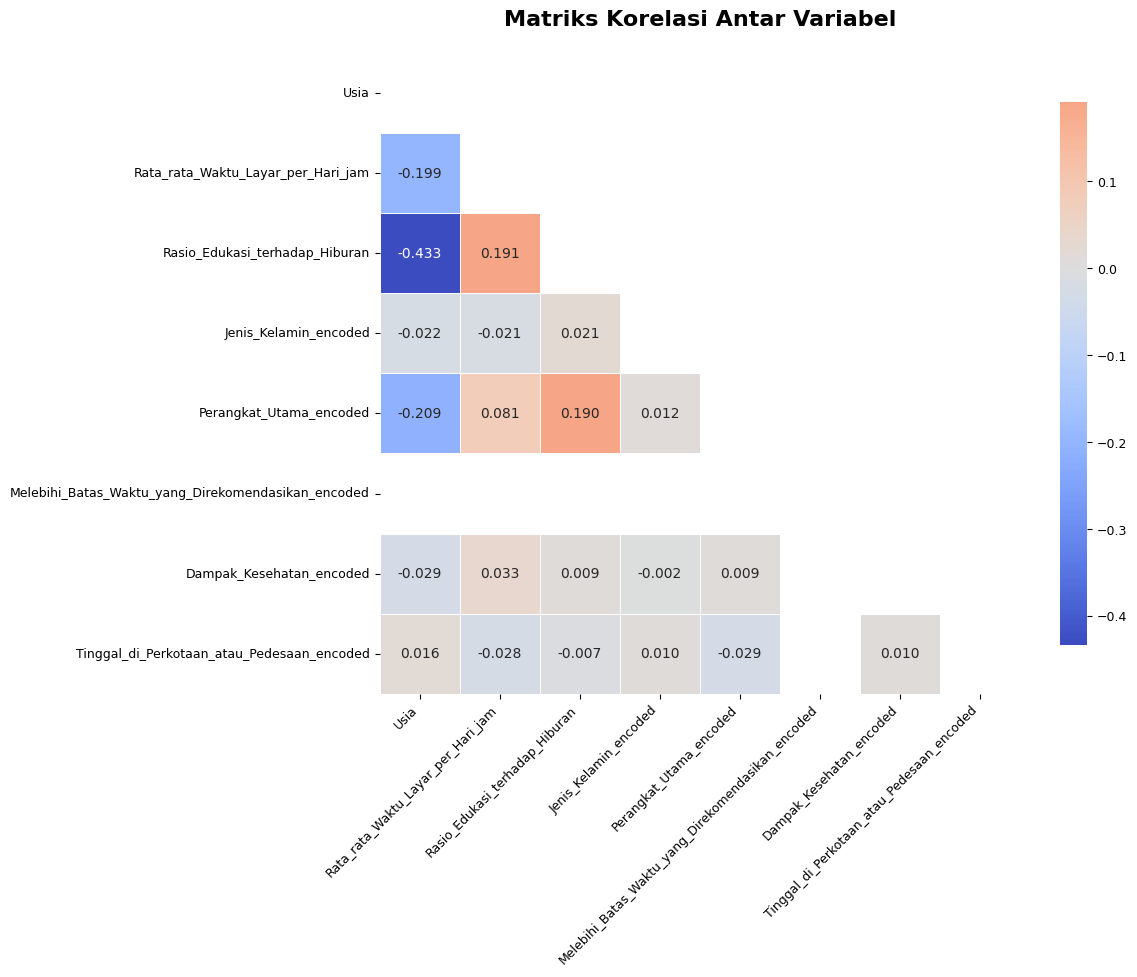


🔍 KORELASI SIGNIFIKAN (|r| > 0.3):
----------------------------------------
• Usia ↔ Rasio_Edukasi_terhadap_Hiburan: r = -0.433 (negatif, lemah)

📱 KORELASI DENGAN Rata_rata_Waktu_Layar_per_Hari_jam:
----------------------------------------
• Usia: r = -0.199 (negatif)
• Rasio_Edukasi_terhadap_Hiburan: r = 0.191 (positif)


In [8]:

# ========================================================================
# c. ANALISIS KORELASI
# ========================================================================

print("\n" + "="*60)
print("=== SECTION C: ANALISIS KORELASI ===")
print("="*60)

print("\n🔍 ANALISIS KORELASI ANTAR VARIABEL")
print("-" * 40)

# Siapkan data untuk analisis korelasi
correlation_data = df.copy()

# Encode semua variabel kategorikal untuk analisis korelasi
le = LabelEncoder()
categorical_columns = ['Jenis_Kelamin', 'Perangkat_Utama', 'Melebihi_Batas_Waktu_yang_Direkomendasikan',
                      'Dampak_Kesehatan', 'Tinggal_di_Perkotaan_atau_Pedesaan']

for col in categorical_columns:
    if col in correlation_data.columns:
        correlation_data[col + '_encoded'] = le.fit_transform(correlation_data[col].astype(str))

# Pilih kolom numerik untuk analisis korelasi
numeric_columns = ['Usia', 'Rata_rata_Waktu_Layar_per_Hari_jam', 'Rasio_Edukasi_terhadap_Hiburan']
encoded_columns = [col + '_encoded' for col in categorical_columns if col in correlation_data.columns]
analysis_columns = numeric_columns + encoded_columns

# Filter kolom yang ada
available_columns = [col for col in analysis_columns if col in correlation_data.columns]

print(f"Kolom yang dianalisis: {available_columns}")

# Hitung matriks korelasi
correlation_matrix = correlation_data[available_columns].corr()

# Tampilkan matriks korelasi
print("\n📊 MATRIKS KORELASI:")
print("-" * 40)
print(correlation_matrix.round(3))

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": .8},
            fmt='.3f',
            linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Analisis korelasi yang signifikan
print("\n🔍 KORELASI SIGNIFIKAN (|r| > 0.3):")
print("-" * 40)

significant_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            significant_correlations.append((var1, var2, corr_value))

if significant_correlations:
    for var1, var2, corr in significant_correlations:
        direction = "positif" if corr > 0 else "negatif"
        strength = "kuat" if abs(corr) > 0.7 else "sedang" if abs(corr) > 0.5 else "lemah"
        print(f"• {var1} ↔ {var2}: r = {corr:.3f} ({direction}, {strength})")
else:
    print("Tidak ada korelasi signifikan yang ditemukan (|r| > 0.3)")

# Fokus pada korelasi dengan waktu layar
target_col = 'Rata_rata_Waktu_Layar_per_Hari_jam'
if target_col in correlation_matrix.columns:
    print(f"\n📱 KORELASI DENGAN {target_col}:")
    print("-" * 40)
    waktu_layar_corr = correlation_matrix[target_col].sort_values(key=abs, ascending=False)

    for var, corr in waktu_layar_corr.items():
        if var != target_col and abs(corr) > 0.1:
            direction = "positif" if corr > 0 else "negatif"
            print(f"• {var}: r = {corr:.3f} ({direction})")



=== SECTION D: MODEL REGRESI LINEAR ===

🤖 MEMBANGUN MODEL REGRESI LINEAR
----------------------------------------
Target variable: Rata_rata_Waktu_Layar_per_Hari_jam
Features yang digunakan: ['Usia', 'Rasio_Edukasi_terhadap_Hiburan', 'Jenis_Kelamin_encoded', 'Perangkat_Utama_encoded', 'Melebihi_Batas_Waktu_yang_Direkomendasikan_encoded', 'Dampak_Kesehatan_encoded', 'Tinggal_di_Perkotaan_atau_Pedesaan_encoded']

📊 DATA SPLITTING:
• Training set: 2839 samples
• Test set: 710 samples

✅ Model berhasil dilatih!

📈 KOEFISIEN MODEL:
------------------------------
Intercept: 4.9168

Koefisien fitur:
• Usia: -0.1883
• Rasio_Edukasi_terhadap_Hiburan: 0.1774
• Jenis_Kelamin_encoded: -0.0356
• Perangkat_Utama_encoded: 0.0426
• Melebihi_Batas_Waktu_yang_Direkomendasikan_encoded: 0.0000
• Dampak_Kesehatan_encoded: 0.0431
• Tinggal_di_Perkotaan_atau_Pedesaan_encoded: -0.0347

🎯 FEATURE IMPORTANCE (berdasarkan koefisien absolut):
--------------------------------------------------
• Usia: -0.1883 (|

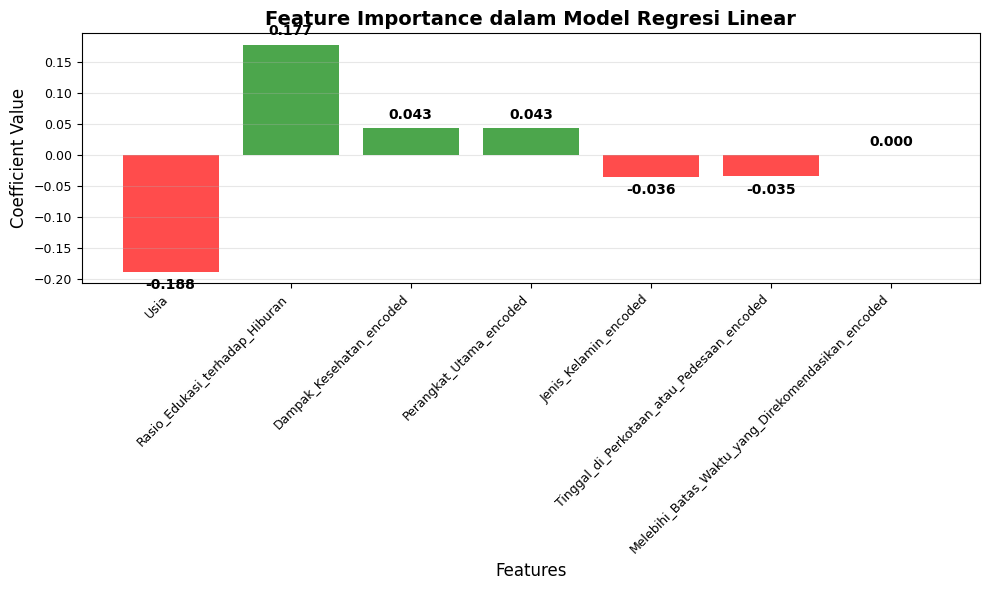

In [9]:
print("\n" + "="*60)
print("=== SECTION D: MODEL REGRESI LINEAR ===")
print("="*60)

print("\n🤖 MEMBANGUN MODEL REGRESI LINEAR")
print("-" * 40)

# Siapkan data untuk modeling
modeling_data = df.copy()

# Target variable
target = 'Rata_rata_Waktu_Layar_per_Hari_jam'
print(f"Target variable: {target}")

# Feature selection
feature_columns = []
numerical_features = ['Usia', 'Rasio_Edukasi_terhadap_Hiburan']
categorical_features = ['Jenis_Kelamin', 'Perangkat_Utama', 'Melebihi_Batas_Waktu_yang_Direkomendasikan',
                       'Dampak_Kesehatan', 'Tinggal_di_Perkotaan_atau_Pedesaan']

# Tambahkan numerical features yang ada
for col in numerical_features:
    if col in modeling_data.columns:
        feature_columns.append(col)

# Encode categorical features
le_dict = {}
for col in categorical_features:
    if col in modeling_data.columns:
        le_dict[col] = LabelEncoder()
        modeling_data[col + '_encoded'] = le_dict[col].fit_transform(modeling_data[col].astype(str))
        feature_columns.append(col + '_encoded')

print(f"Features yang digunakan: {feature_columns}")

# Siapkan X dan y
X = modeling_data[feature_columns]
y = modeling_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 DATA SPLITTING:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Test set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat dan latih model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"\n✅ Model berhasil dilatih!")

# Prediksi
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Tampilkan koefisien model
print(f"\n📈 KOEFISIEN MODEL:")
print("-" * 30)
print(f"Intercept: {model.intercept_:.4f}")
print("\nKoefisien fitur:")
for i, feature in enumerate(feature_columns):
    print(f"• {feature}: {model.coef_[i]:.4f}")

# Analisis feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n🎯 FEATURE IMPORTANCE (berdasarkan koefisien absolut):")
print("-" * 50)
for _, row in feature_importance.iterrows():
    print(f"• {row['Feature']}: {row['Coefficient']:.4f} (|{row['Abs_Coefficient']:.4f}|)")

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
bars = plt.bar(range(len(feature_importance)), feature_importance['Coefficient'], color=colors, alpha=0.7)

plt.title('Feature Importance dalam Model Regresi Linear', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(range(len(feature_importance)), feature_importance['Feature'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai pada bar
for bar, value in zip(bars, feature_importance['Coefficient']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.01),
             f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()



=== SECTION E: EVALUASI MODEL LINEAR ===

📊 EVALUASI PERFORMA MODEL
----------------------------------------
🎯 METRIK EVALUASI:
-------------------------
TRAINING SET:
• MSE (Mean Squared Error): 1.5605
• RMSE (Root Mean Squared Error): 1.2492
• MAE (Mean Absolute Error): 0.9699
• R² (Coefficient of Determination): 0.0652

TEST SET:
• MSE (Mean Squared Error): 1.6666
• RMSE (Root Mean Squared Error): 1.2910
• MAE (Mean Absolute Error): 1.0137
• R² (Coefficient of Determination): 0.0171

🔍 ANALISIS MODEL:
-------------------------
✅ Model relatif seimbang
❌ Model memiliki performa rendah (R² < 0.5)


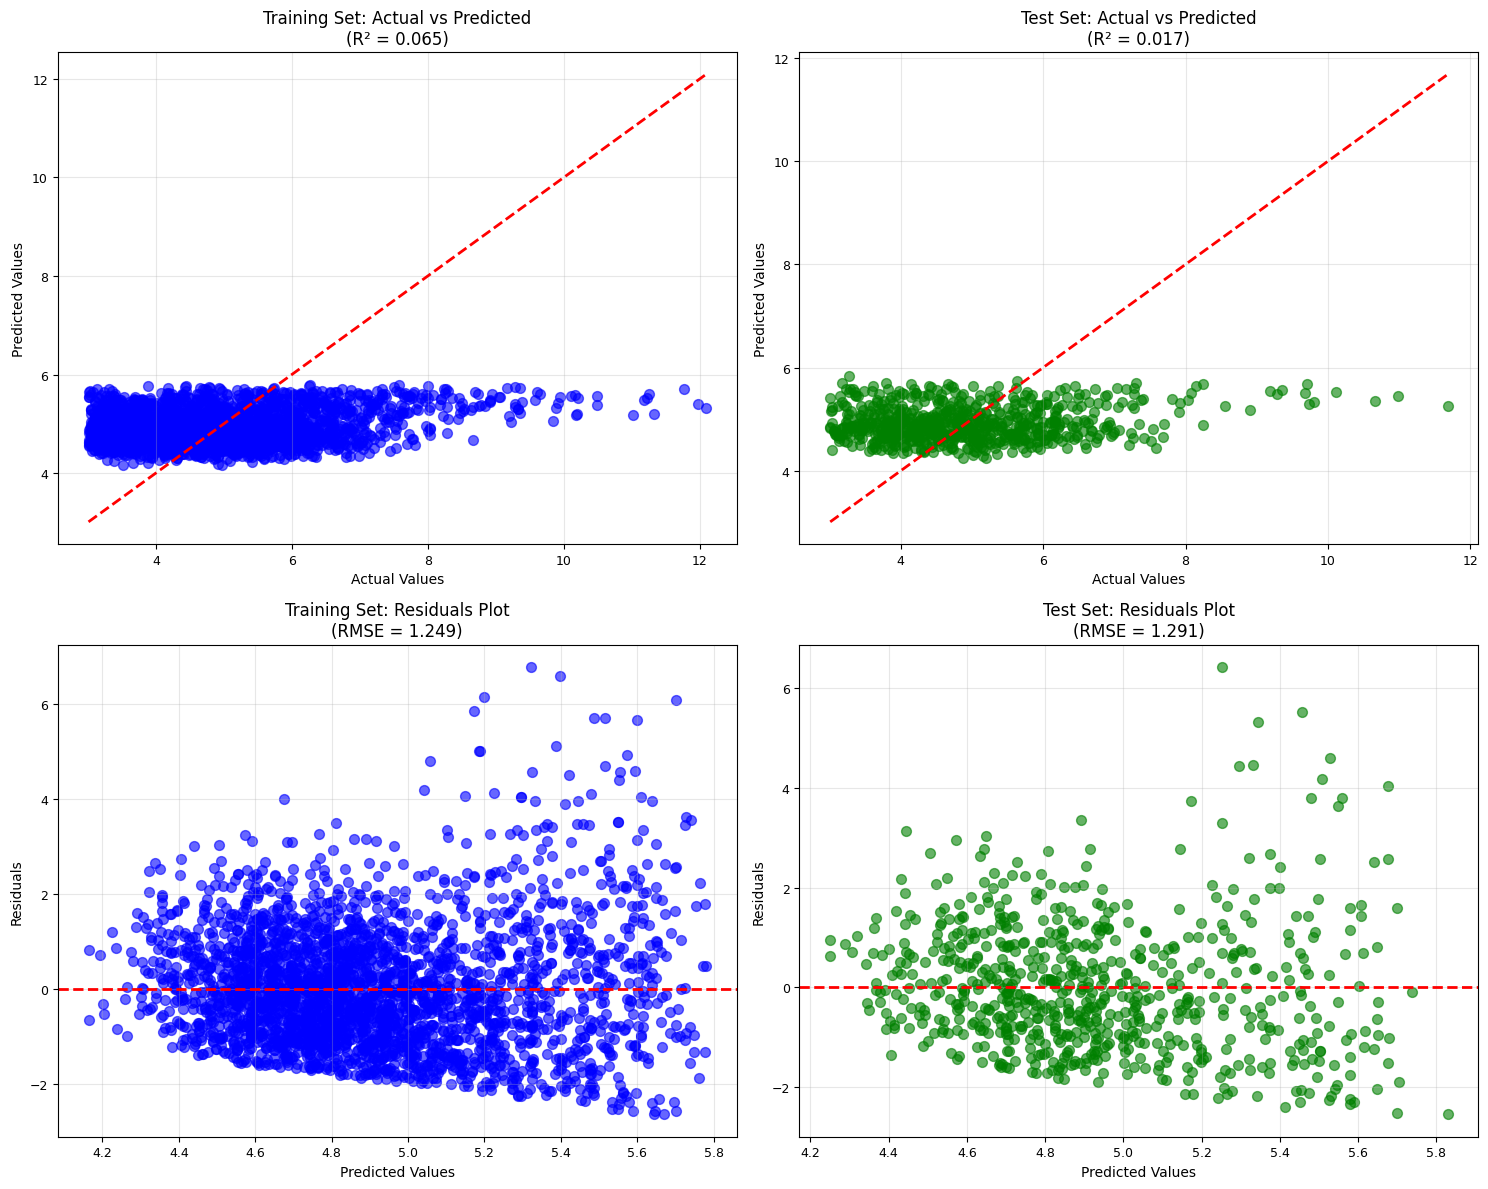


📊 ANALISIS RESIDUALS:
------------------------------
Training residuals - Mean: -0.0000, Std: 1.2494
Test residuals - Mean: 0.0047, Std: 1.2919

Test Normalitas Residuals (Shapiro-Wilk):
• Training: p-value = 0.0000
• Test: p-value = 0.0000
⚠️  Residuals tidak terdistribusi normal


In [10]:

# ========================================================================
# e. EVALUASI MODEL LINEAR
# ========================================================================
print("\n" + "="*60)
print("=== SECTION E: EVALUASI MODEL LINEAR ===")
print("="*60)

print("\n📊 EVALUASI PERFORMA MODEL")
print("-" * 40)

# Hitung metrik evaluasi
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Tampilkan hasil evaluasi
print("🎯 METRIK EVALUASI:")
print("-" * 25)
print(f"TRAINING SET:")
print(f"• MSE (Mean Squared Error): {train_mse:.4f}")
print(f"• RMSE (Root Mean Squared Error): {train_rmse:.4f}")
print(f"• MAE (Mean Absolute Error): {train_mae:.4f}")
print(f"• R² (Coefficient of Determination): {train_r2:.4f}")

print(f"\nTEST SET:")
print(f"• MSE (Mean Squared Error): {test_mse:.4f}")
print(f"• RMSE (Root Mean Squared Error): {test_rmse:.4f}")
print(f"• MAE (Mean Absolute Error): {test_mae:.4f}")
print(f"• R² (Coefficient of Determination): {test_r2:.4f}")

# Analisis overfitting/underfitting
print(f"\n🔍 ANALISIS MODEL:")
print("-" * 25)
r2_diff = train_r2 - test_r2
rmse_diff = test_rmse - train_rmse

if r2_diff > 0.1:
    print("⚠️  Kemungkinan overfitting (R² training >> R² test)")
elif r2_diff < -0.05:
    print("⚠️  Kemungkinan underfitting (R² test > R² training)")
else:
    print("✅ Model relatif seimbang")

if test_r2 > 0.7:
    print("✅ Model memiliki performa yang baik (R² > 0.7)")
elif test_r2 > 0.5:
    print("⚠️  Model memiliki performa sedang (0.5 < R² < 0.7)")
else:
    print("❌ Model memiliki performa rendah (R² < 0.5)")

# Visualisasi hasil prediksi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=50)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_r2:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', s=50)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_r2:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals (Training)
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue', s=50)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title(f'Training Set: Residuals Plot\n(RMSE = {train_rmse:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals (Test)
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green', s=50)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Test Set: Residuals Plot\n(RMSE = {test_rmse:.3f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis residuals
print(f"\n📊 ANALISIS RESIDUALS:")
print("-" * 30)
print(f"Training residuals - Mean: {train_residuals.mean():.4f}, Std: {train_residuals.std():.4f}")
print(f"Test residuals - Mean: {test_residuals.mean():.4f}, Std: {test_residuals.std():.4f}")

# Cek normalitas residuals
from scipy import stats
train_shapiro = stats.shapiro(train_residuals)
test_shapiro = stats.shapiro(test_residuals)
print(f"\nTest Normalitas Residuals (Shapiro-Wilk):")
print(f"• Training: p-value = {train_shapiro.pvalue:.4f}")
print(f"• Test: p-value = {test_shapiro.pvalue:.4f}")

if train_shapiro.pvalue > 0.05 and test_shapiro.pvalue > 0.05:
    print("✅ Residuals terdistribusi normal")
else:
    print("⚠️  Residuals tidak terdistribusi normal")


In [11]:

# ========================================================================
# f. INTERPRETASI HASIL DAN REKOMENDASI
# ========================================================================

print("\n" + "="*60)
print("=== SECTION F: INTERPRETASI HASIL DAN REKOMENDASI ===")
print("="*60)

print("\n🎯 INTERPRETASI HASIL MODEL")
print("-" * 40)

# Interpretasi koefisien terpenting
print("\n🔍 INTERPRETASI KOEFISIEN TERPENTING:")
print("-" * 40)

for _, row in feature_importance.head(3).iterrows():
    feature = row['Feature']
    coef = row['Coefficient']

    # Interpretasi berdasarkan nama fitur
    if 'Usia' in feature:
        if coef > 0:
            print(f"• {feature}: Setiap penambahan 1 tahun usia meningkatkan waktu layar sebesar {coef:.3f} jam")
        else:
            print(f"• {feature}: Setiap penambahan 1 tahun usia menurunkan waktu layar sebesar {abs(coef):.3f} jam")

    elif 'Rasio_Edukasi' in feature:
        if coef > 0:
            print(f"• {feature}: Peningkatan rasio edukasi terhadap hiburan meningkatkan waktu layar sebesar {coef:.3f} jam")
        else:
            print(f"• {feature}: Peningkatan rasio edukasi terhadap hiburan menurunkan waktu layar sebesar {abs(coef):.3f} jam")

    elif 'encoded' in feature:
        original_feature = feature.replace('_encoded', '')
        if coef > 0:
            print(f"• {original_feature}: Memiliki pengaruh positif terhadap waktu layar ({coef:.3f})")
        else:
            print(f"• {original_feature}: Memiliki pengaruh negatif terhadap waktu layar ({coef:.3f})")

# Temuan utama dari data
print(f"\n📊 TEMUAN UTAMA DARI DATA:")
print("-" * 40)

# Analisis deskriptif
waktu_layar_mean = df['Rata_rata_Waktu_Layar_per_Hari_jam'].mean()
waktu_layar_median = df['Rata_rata_Waktu_Layar_per_Hari_jam'].median()
pct_exceeding = (df['Melebihi_Batas_Waktu_yang_Direkomendasikan'] == 'Ya').mean() * 100

print(f"• Rata-rata waktu layar: {waktu_layar_mean:.2f} jam per hari")
print(f"• Median waktu layar: {waktu_layar_median:.2f} jam per hari")
print(f"• Persentase anak yang melebihi batas waktu yang direkomendasikan: {pct_exceeding:.1f}%")

# Analisis berdasarkan jenis kelamin
gender_analysis = df.groupby('Jenis_Kelamin')['Rata_rata_Waktu_Layar_per_Hari_jam'].mean()
print(f"\n• Rata-rata waktu layar berdasarkan jenis kelamin:")
for gender, avg_time in gender_analysis.items():
    print(f"  - {gender}: {avg_time:.2f} jam per hari")

# Analisis berdasarkan perangkat
device_analysis = df.groupby('Perangkat_Utama')['Rata_rata_Waktu_Layar_per_Hari_jam'].mean().sort_values(ascending=False)
print(f"\n• Rata-rata waktu layar berdasarkan perangkat utama:")
for device, avg_time in device_analysis.items():
    print(f"  - {device}: {avg_time:.2f} jam per hari")

# Analisis dampak kesehatan
health_counts = df['Dampak_Kesehatan'].value_counts()
print(f"\n• Distribusi dampak kesehatan:")
for health, count in health_counts.items():
    pct = (count / len(df)) * 100
    print(f"  - {health}: {count} anak ({pct:.1f}%)")

# Analisis lokasi
location_analysis = df.groupby('Tinggal_di_Perkotaan_atau_Pedesaan')['Rata_rata_Waktu_Layar_per_Hari_jam'].mean()
print(f"\n• Rata-rata waktu layar berdasarkan lokasi:")
for location, avg_time in location_analysis.items():
    print(f"  - {location}: {avg_time:.2f} jam per hari")

# Rekomendasi
print(f"\n💡 REKOMENDASI BERDASARKAN ANALISIS:")
print("-" * 40)

recommendations = [
    "UNTUK ORANG TUA DAN PENGASUH:",
    "• Batasi waktu layar sesuai rekomendasi usia (2 jam untuk anak di bawah 18 tahun)",
    "• Prioritaskan konten edukatif dibanding hiburan semata",
    "• Awasi tanda-tanda dampak kesehatan seperti gangguan tidur dan ketegangan mata",
    "• Dorong aktivitas fisik dan interaksi sosial di luar layar",
    "",
    "UNTUK PEMBUAT KEBIJAKAN:",
    "• Buat panduan yang jelas tentang penggunaan layar yang sehat untuk anak-anak",
    "• Edukasi masyarakat tentang risiko penggunaan layar berlebihan",
    "• Dorong pengembangan konten edukatif yang berkualitas",
    "• Pertimbangkan regulasi untuk aplikasi yang ditujukan untuk anak-anak",
    "",
    "UNTUK PENGEMBANG APLIKASI:",
    "• Implementasikan fitur kontrol waktu dan istirahat",
    "• Buat konten yang mendorong pembelajaran aktif",
    "• Sediakan panduan untuk orang tua tentang penggunaan aplikasi",
    "• Pertimbangkan dampak kesehatan dalam desain aplikasi"
]

for rec in recommendations:
    print(rec)

# Kesimpulan
print(f"\n🎯 KESIMPULAN:")
print("-" * 40)
print(f"Berdasarkan analisis data penggunaan layar device pada {len(df)} anak di India:")
print(f"1. Model regresi linear menunjukkan R² = {test_r2:.3f}, yang berarti model dapat menjelaskan {test_r2*100:.1f}% variasi dalam waktu layar")
print(f"2. Mayoritas anak ({pct_exceeding:.1f}%) melebihi batas waktu layar yang direkomendasikan")
print(f"3. Dampak kesehatan yang paling umum adalah gangguan tidur dan ketegangan mata")
print(f"4. Diperlukan intervensi untuk mengurangi waktu layar dan meningkatkan kualitas konten")

print(f"\n✅ ANALISIS LENGKAP SELESAI!")
print("="*60)




=== SECTION F: INTERPRETASI HASIL DAN REKOMENDASI ===

🎯 INTERPRETASI HASIL MODEL
----------------------------------------

🔍 INTERPRETASI KOEFISIEN TERPENTING:
----------------------------------------
• Usia: Setiap penambahan 1 tahun usia menurunkan waktu layar sebesar 0.188 jam
• Rasio_Edukasi_terhadap_Hiburan: Peningkatan rasio edukasi terhadap hiburan meningkatkan waktu layar sebesar 0.177 jam
• Dampak_Kesehatan: Memiliki pengaruh positif terhadap waktu layar (0.043)

📊 TEMUAN UTAMA DARI DATA:
----------------------------------------
• Rata-rata waktu layar: 4.92 jam per hari
• Median waktu layar: 4.72 jam per hari
• Persentase anak yang melebihi batas waktu yang direkomendasikan: 100.0%

• Rata-rata waktu layar berdasarkan jenis kelamin:
  - Female: 4.95 jam per hari
  - Male: 4.89 jam per hari

• Rata-rata waktu layar berdasarkan perangkat utama:
  - Tablet: 5.06 jam per hari
  - TV: 5.04 jam per hari
  - Smartphone: 4.89 jam per hari
  - Laptop: 4.73 jam per hari

• Distribusi